In [1]:
import pandas as pd
df=pd.read_csv('n50.csv')

In [2]:
df1=df.reset_index()['ASIANPAINT']

In [3]:
df1

0        845.420471
1        847.392639
2        866.489807
3        852.780334
4        839.263062
           ...     
1477    3272.399902
1478    3368.199951
1479    3367.449951
1480    3365.699951
1481    3382.949951
Name: ASIANPAINT, Length: 1482, dtype: float64

In [4]:
df1.shape

(1482,)

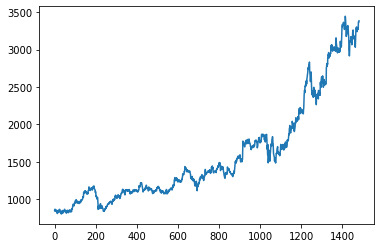

In [5]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [6]:
import numpy as np

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [8]:
df1.shape

(1482, 1)

In [9]:
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [10]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [11]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [12]:
print(X_train.shape), print(y_train.shape)

(1084, 100)
(1084,)


(None, None)

In [13]:
print(X_test.shape), print(ytest.shape)

(196, 100)
(196,)


(None, None)

In [14]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [15]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [16]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
17/17 [==============================] - 9s 276ms/step - loss: 0.0111 - val_loss: 0.1007
Epoch 2/100
17/17 [==============================] - 3s 197ms/step - loss: 0.0016 - val_loss: 0.0088
Epoch 3/100
17/17 [==============================] - 3s 180ms/step - loss: 6.4938e-04 - val_loss: 0.0016
Epoch 4/100
17/17 [==============================] - 3s 191ms/step - loss: 5.6924e-04 - val_loss: 0.0047
Epoch 5/100
17/17 [==============================] - 3s 178ms/step - loss: 5.5175e-04 - val_loss: 0.0029
Epoch 6/100
17/17 [==============================] - 3s 180ms/step - loss: 5.3454e-04 - val_loss: 0.0036
Epoch 7/100
17/17 [==============================] - 3s 182ms/step - loss: 5.2385e-04 - val_loss: 0.0032
Epoch 8/100
17/17 [==============================] - 3s 178ms/step - loss: 5.1959e-04 - val_loss: 0.0035
Epoch 9/100
17/17 [==============================] - 3s 183ms/step - loss: 5.1282e-04 - val_loss: 0.0019
Epoch 10/100
17/17 [==============================] - 3s 203ms/

Epoch 78/100
17/17 [==============================] - 3s 205ms/step - loss: 1.5097e-04 - val_loss: 5.5486e-04
Epoch 79/100
17/17 [==============================] - 3s 195ms/step - loss: 1.4430e-04 - val_loss: 5.5856e-04
Epoch 80/100
17/17 [==============================] - 4s 216ms/step - loss: 1.5273e-04 - val_loss: 7.3078e-04
Epoch 81/100
17/17 [==============================] - 3s 186ms/step - loss: 1.5267e-04 - val_loss: 5.0962e-04
Epoch 82/100
17/17 [==============================] - 4s 207ms/step - loss: 1.3940e-04 - val_loss: 8.4806e-04
Epoch 83/100
17/17 [==============================] - 3s 197ms/step - loss: 1.6773e-04 - val_loss: 9.0723e-04
Epoch 84/100
17/17 [==============================] - 3s 184ms/step - loss: 1.4171e-04 - val_loss: 5.5449e-04
Epoch 85/100
17/17 [==============================] - 3s 182ms/step - loss: 1.3810e-04 - val_loss: 6.1079e-04
Epoch 86/100
17/17 [==============================] - 3s 177ms/step - loss: 1.3507e-04 - val_loss: 4.7869e-04
Epoch 87/1

In [19]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [20]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [21]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1366.465921684784

In [22]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

3042.426593363337

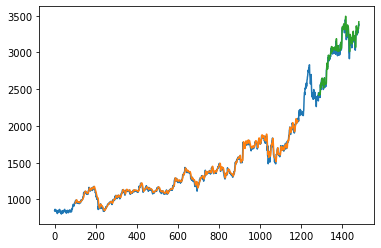

In [23]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [24]:
x_input=test_data[197:].reshape(1,-1)
x_input.shape

(1, 100)

In [25]:
len(test_data)

297

In [26]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [27]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9861679]
101
1 day input [0.82169595 0.8199752  0.82107195 0.8260642  0.8195213  0.83612449
 0.83092415 0.87305597 0.8596298  0.84771638 0.8447286  0.84533365
 0.84425584 0.87146751 0.9064892  0.94483896 0.94440411 0.95847322
 0.94967997 0.95750876 0.95764123 0.96132872 0.96915751 0.96743667
 0.96357899 0.95972131 0.94495248 0.93303906 0.94727837 0.95041748
 0.95160881 1.         0.99321111 0.97394166 0.95251651 0.92286535
 0.89760147 0.90658377 0.92668522 0.91061155 0.94033843 0.94640847
 0.94608705 0.95259213 0.9526867  0.94296688 0.92167402 0.89983279
 0.89448121 0.83109434 0.82368155 0.79934424 0.81891625 0.86613489
 0.87571475 0.86958064 0.87779732 0.87081125 0.89629431 0.89197774
 0.88393143 0.88663874 0.87268555 0.85572202 0.87821378 0.89555596
 0.88911892 0.91886188 0.91757451 0.93060003 0.90193625 0.89112578
 0.88629799 0.88586258 0.88631695 0.88607077 0.88398819 0.90006195
 0.87349961 0.84618006 0.84316981 0.87276126 0.89934246 0.93889242
 0.93764295 0.94432608 0.94601106 

10 day output [[1.0629318]]
11 day input [0.8447286  0.84533365 0.84425584 0.87146751 0.9064892  0.94483896
 0.94440411 0.95847322 0.94967997 0.95750876 0.95764123 0.96132872
 0.96915751 0.96743667 0.96357899 0.95972131 0.94495248 0.93303906
 0.94727837 0.95041748 0.95160881 1.         0.99321111 0.97394166
 0.95251651 0.92286535 0.89760147 0.90658377 0.92668522 0.91061155
 0.94033843 0.94640847 0.94608705 0.95259213 0.9526867  0.94296688
 0.92167402 0.89983279 0.89448121 0.83109434 0.82368155 0.79934424
 0.81891625 0.86613489 0.87571475 0.86958064 0.87779732 0.87081125
 0.89629431 0.89197774 0.88393143 0.88663874 0.87268555 0.85572202
 0.87821378 0.89555596 0.88911892 0.91886188 0.91757451 0.93060003
 0.90193625 0.89112578 0.88629799 0.88586258 0.88631695 0.88607077
 0.88398819 0.90006195 0.87349961 0.84618006 0.84316981 0.87276126
 0.89934246 0.93889242 0.93764295 0.94432608 0.94601106 0.94474264
 0.9239547  0.92234544 0.93442443 0.93773761 0.93311801 0.93951725
 0.93482194 0.9710966

20 day output [[1.1323489]]
21 day input [0.95764123 0.96132872 0.96915751 0.96743667 0.96357899 0.95972131
 0.94495248 0.93303906 0.94727837 0.95041748 0.95160881 1.
 0.99321111 0.97394166 0.95251651 0.92286535 0.89760147 0.90658377
 0.92668522 0.91061155 0.94033843 0.94640847 0.94608705 0.95259213
 0.9526867  0.94296688 0.92167402 0.89983279 0.89448121 0.83109434
 0.82368155 0.79934424 0.81891625 0.86613489 0.87571475 0.86958064
 0.87779732 0.87081125 0.89629431 0.89197774 0.88393143 0.88663874
 0.87268555 0.85572202 0.87821378 0.89555596 0.88911892 0.91886188
 0.91757451 0.93060003 0.90193625 0.89112578 0.88629799 0.88586258
 0.88631695 0.88607077 0.88398819 0.90006195 0.87349961 0.84618006
 0.84316981 0.87276126 0.89934246 0.93889242 0.93764295 0.94432608
 0.94601106 0.94474264 0.9239547  0.92234544 0.93442443 0.93773761
 0.93311801 0.93951725 0.93482194 0.97109661 0.97081262 0.97014999
 0.9766817  0.98616791 0.99213839 1.00077522 1.00992358 1.01902509
 1.02772701 1.03579104 1.0431

In [28]:
day_new=np.arange(1,101)
day_pred=np.arange(101,101+30)

In [29]:
day_new

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [30]:
import matplotlib.pyplot as plt

In [31]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [32]:
len(df1)

1482

In [33]:
scaler.inverse_transform(lst_output)

array([[3408.00268002],
       [3423.77048773],
       [3446.58003641],
       [3470.74050881],
       [3494.77725409],
       [3517.75869845],
       [3539.05550223],
       [3558.5414197 ],
       [3576.56181634],
       [3593.73595735],
       [3610.73316545],
       [3628.08140593],
       [3646.05993055],
       [3664.6800731 ],
       [3683.74475171],
       [3702.95330638],
       [3722.00444742],
       [3740.68220335],
       [3758.89023703],
       [3776.65027155],
       [3794.06116265],
       [3811.25419329],
       [3828.34333095],
       [3845.39878209],
       [3862.43376946],
       [3879.41492137],
       [3896.28430961],
       [3912.98085769],
       [3929.45419325],
       [3945.67944495]])

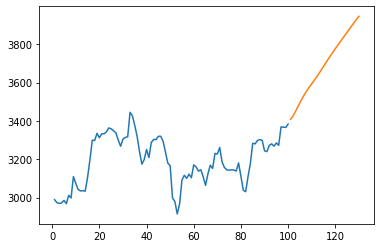

In [34]:
plt.plot(day_new,scaler.inverse_transform(df1[len(df1)-100:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))